In [5]:
import qnmfits
import os 
os.environ['JAX_PLATFORMS'] = 'cpu'
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from functools import partial

jax.config.update("jax_platform_name", "cpu")
jax.config.update("jax_enable_x64", True)

In [6]:
def get_frequency(mode, chif, Mf):
    """
    Compute the frequency for a given QNM mode and spin.

    Args:
        mode (tuple): QNM mode (ell, m, n, sign).
        chif (float): Remnant spin.

    Returns:
        complex: Frequency of the QNM.
    """
    return sum(
        [
            qnmfits.qnm.omega(ell, m, n, sign, chif, Mf, s=-2)
            for ell, m, n, sign in [mode[i : i + 4] for i in range(0, len(mode), 4)]
        ]
    )

def get_mixing(mode, sph_mode, chif):
    """
    Compute the mixing coefficient for a given QNM mode.

    Args:
        mode (tuple): QNM mode (ell, m, n, sign).
        chif (float): Remnant spin.

    Returns:
        complex: Mixing coefficient of the QNM. Or, if quadratic or cubic, 1.
    """
    ell, m = sph_mode
    if len(mode) == 4:
        lp, mp, nprime, sign = mode
        return qnmfits.qnm.mu(ell, m, lp, mp, nprime, sign, chif)
    elif len(mode) == 8:
        return 1 + 0j
    elif len(mode) == 12:
        return 1 + 0j

In [7]:
def get_domega_dchif(mode, chif, Mf, delta):
    """Compute domega/dchif for a given QNM."""
    omega_plus = get_frequency(mode, chif + delta, Mf)
    omega_minus = get_frequency(mode, chif - delta, Mf)
    return (omega_plus - omega_minus) / (2 * delta)

def get_dmu_dchif(mode, sph_mode, chif, delta):
    """Compute dmu/dchif for a given QNM."""
    mu_plus = get_mixing(mode, sph_mode, chif=chif + delta)
    mu_minus = get_mixing(mode, sph_mode, chif=chif - delta)
    return (mu_plus - mu_minus) / (2 * delta)

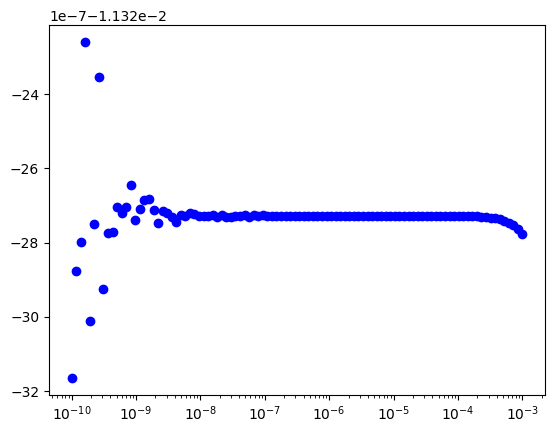

In [14]:
log_range = jnp.logspace(-10, -3, num=100)

for delta in log_range:
    #plt.plot(delta, get_domega_dchif((2, 2, 0, 1), 0.7, 0.95, delta), 'ro')
    plt.xscale('log')
    #plt.yscale('log')
    plt.plot(delta, get_dmu_dchif((2, 2, 0, 1), (2, 2), 0.7, delta), 'bo')